In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd

In [2]:
#dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bodyPerformance.csv")
dataset=pd.read_csv("F:\\ML\\ML Ineuron\\Project\\Body Performance\\bodyPerformance.csv")
dataset.shape

(13393, 12)

In [3]:
dataset.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
dataset.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
dataset['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder
lblEn_category = LabelEncoder()
dataset['class'] =lblEn_category.fit_transform(dataset['class'])
lblEn_gender = LabelEncoder()
dataset['gender'] =lblEn_gender.fit_transform(dataset['gender'])
dataset.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


no null values, all columns converted to numeric

In [8]:
lblEn_category.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [9]:
lblEn_gender.classes_

array(['F', 'M'], dtype=object)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

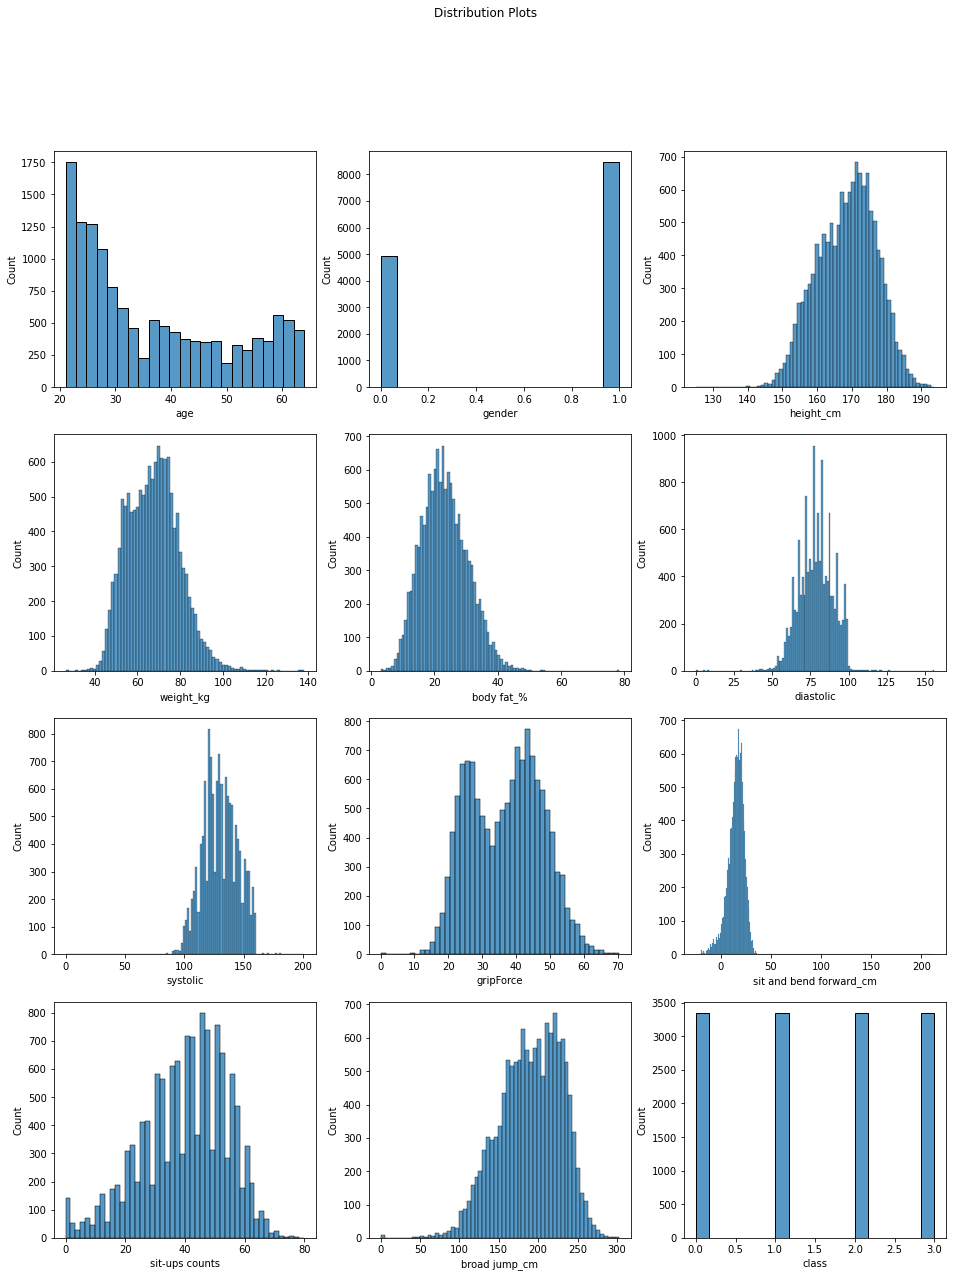

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(16, 20))
fig.suptitle('Distribution Plots')
axs = axes.ravel()
for i in range(0,dataset.shape[1]):
    sns.histplot(ax=axs[i], data=dataset[dataset.columns[i]])   

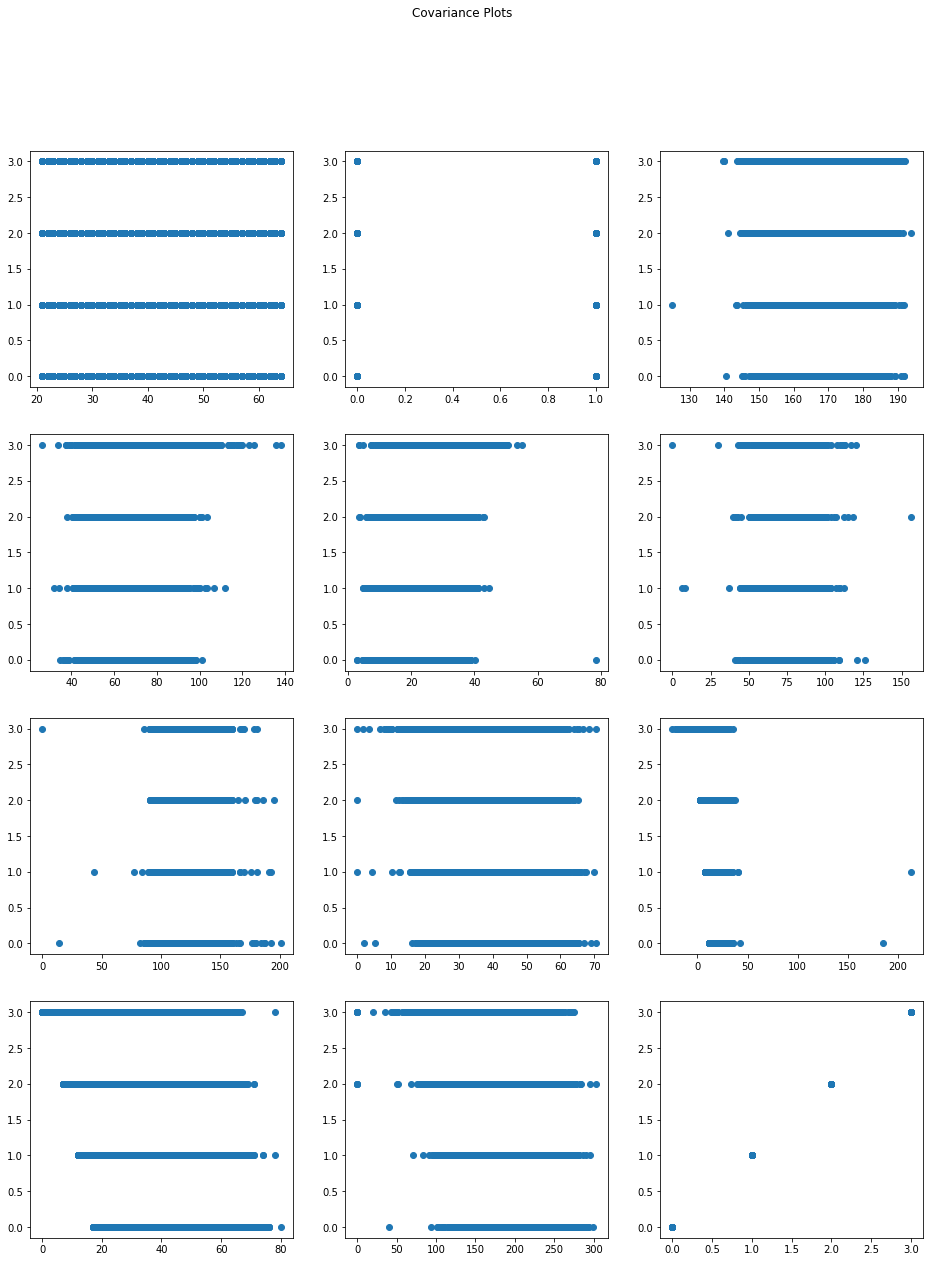

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(16, 20))
fig.suptitle('Covariance Plots')
axs = axes.ravel()
for i in range(0,dataset.shape[1]):
    axs[i].scatter(dataset[dataset.columns[i]],dataset['class'])  

<AxesSubplot:>

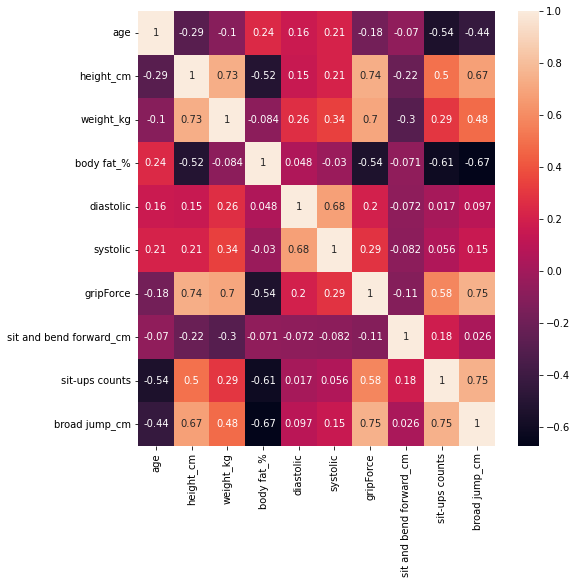

In [13]:
#correltion plot
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(dataset.drop(axis=1, columns=['gender','class']).corr(), annot=True,ax=axes)

since no columns have correlation > 0.95, no need to drop any columns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

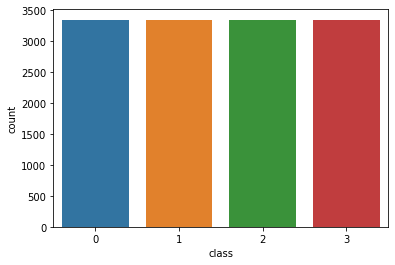

In [14]:
sns.countplot(dataset['class'])

output classes are well balanced

In [15]:
x=dataset.drop(['class'],axis=1)
y=dataset['class']

## clustering 

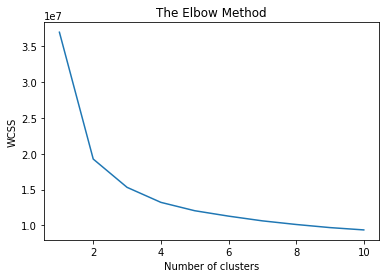

In [16]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(init='k-means++',n_clusters=i, random_state=0).fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [18]:
from kneed import KneeLocator
optimal_clusters=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
optimal_clusters.knee

3

In [19]:
kmean = KMeans(init='k-means++',n_clusters=3, random_state=0)
y_kmean=kmean.fit_predict(x)
len(y_kmean)

13393

In [20]:
x['cluster']=y_kmean
x['Labels']=y

In [21]:
x.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,cluster,Labels
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1


In [22]:
x['cluster'].value_counts()

0    5502
2    5148
1    2743
Name: cluster, dtype: int64

### Cluster 1 Training:

In [23]:
cluster_data=x[x['cluster']==0] #1st cluster
cluster_features=cluster_data.drop(['Labels','cluster'],axis=1)
cluster_label= cluster_data['Labels']

In [24]:
from sklearn.preprocessing import StandardScaler
cluster_featuresscaled = StandardScaler().fit_transform(cluster_features)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_featuresscaled, cluster_label, test_size=1 / 3, random_state=355)

In [26]:
accuracy_table=pd.DataFrame(columns=['Model','TrainAcuracy','TestAcuracy','TrainAcuracy_Tuning','TestAcuracy_Tuning'])

#### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LogRegclf = LogisticRegression(random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf.score(x_train, y_train)}')
print(f'testing score: {LogRegclf.score(x_test, y_test)}')

training score: 0.6035986913849509
testing score: 0.6008724100327154


In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
'''
parameters = {'solver':['newton-cg', 'sag','saga','lbfgs'], 'multi_class':['auto'],'penalty':['l1', 'l2', 'elasticnet'],'C':np.logspace(-3,3,7)}
LogRegclf_Regu = LogisticRegression()
LogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=8).fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)
print("accuracy :",LogRegclf_GSCV.best_score_)
'''

'\nparameters = {\'solver\':[\'newton-cg\', \'sag\',\'saga\',\'lbfgs\'], \'multi_class\':[\'auto\'],\'penalty\':[\'l1\', \'l2\', \'elasticnet\'],\'C\':np.logspace(-3,3,7)}\nLogRegclf_Regu = LogisticRegression()\nLogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=8).fit(x_train,y_train)\nprint("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)\nprint("accuracy :",LogRegclf_GSCV.best_score_)\n'

In [29]:
LogRegclf1 = LogisticRegression(C= 0.01, multi_class= 'auto', penalty= 'l2', solver= 'newton-cg',random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf1.score(x_train, y_train)}')
print(f'testing score: {LogRegclf1.score(x_test, y_test)}')

training score: 0.6079607415485279
testing score: 0.6030534351145038


In [30]:
accuracy_table.loc[0]=['Logistic Regression',LogRegclf.score(x_train, y_train),LogRegclf.score(x_test, y_test),LogRegclf1.score(x_train, y_train),LogRegclf1.score(x_test, y_test)]

#### 2. SVC

In [31]:
from sklearn.svm import SVC
SVCclf = SVC(random_state = 0).fit(x_train, y_train)
print(f'training score: {SVCclf.score(x_train, y_train)}')
print(f'testing score: {SVCclf.score(x_test, y_test)}')

training score: 0.7369138495092693
testing score: 0.6570338058887677


In [32]:
'''
parameters ={'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
SVC_Regu = SVC(random_state = 0)
SVC_GSCV = GridSearchCV(SVC_Regu, parameters, cv=7).fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",SVC_GSCV.best_params_)
print("accuracy :",SVC_GSCV.best_score_)
'''

'\nparameters ={\'C\': [0.1, 1, 10, 100, 1000],\'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\'kernel\': [\'rbf\']}\nSVC_Regu = SVC(random_state = 0)\nSVC_GSCV = GridSearchCV(SVC_Regu, parameters, cv=7).fit(x_train,y_train)\nprint("tuned hpyerparameters :(best parameters) ",SVC_GSCV.best_params_)\nprint("accuracy :",SVC_GSCV.best_score_)\n'

In [33]:
SVC1 = SVC(C= 100, gamma= 0.01, kernel='rbf', random_state=0).fit(x_train, y_train)
print(f'training score: {SVC1.score(x_train, y_train)}')
print(f'testing score: {SVC1.score(x_test, y_test)}')

training score: 0.7262813522355507
testing score: 0.6728462377317339


In [34]:
accuracy_table.loc[1]=['SVC',SVCclf.score(x_train, y_train),SVCclf.score(x_test, y_test),
                       SVC1.score(x_train, y_train),SVC1.score(x_test, y_test)]

#### 3. Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
print(f'training score: {DTC.score(x_train, y_train)}')
print(f'testing score: {DTC.score(x_test, y_test)}')

training score: 1.0
testing score: 0.6314067611777535


In [36]:
'''
parameters ={'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
for i in  range(2,11):   
    DTC_Regu = DecisionTreeClassifier(random_state = 0)
    DTC_GSCV = GridSearchCV(DTC_Regu, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV.best_params_)
    print("accuracy :",DTC_GSCV.best_score_)
    '''

'\nparameters ={\'max_depth\': [2, 3, 5, 10, 20],\'min_samples_leaf\': [5, 10, 20, 50, 100],\'criterion\': ["gini", "entropy"]}\nfor i in  range(2,11):   \n    DTC_Regu = DecisionTreeClassifier(random_state = 0)\n    DTC_GSCV = GridSearchCV(DTC_Regu, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV.best_params_)\n    print("accuracy :",DTC_GSCV.best_score_)\n    '

In [37]:
DTC1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 10, random_state=0).fit(x_train, y_train)
print(f'training score: {DTC1.score(x_train, y_train)}')
print(f'testing score: {DTC1.score(x_test, y_test)}')

training score: 0.7778080697928026
testing score: 0.6826608505997819


In [38]:
accuracy_table.loc[2]=['Decision Tree Classifier',DTC.score(x_train, y_train),DTC.score(x_test, y_test),
                       DTC1.score(x_train, y_train),DTC1.score(x_test, y_test)]

#### 4. KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier().fit(x_train, y_train)
print(f'training score: {neigh.score(x_train, y_train)}')
print(f'testing score: {neigh.score(x_test, y_test)}')

training score: 0.7044711014176663
testing score: 0.5381679389312977


In [40]:
'''
parameters ={ 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
for i in  range(2,11):   
    neigh_Regu = KNeighborsClassifier()
    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)
    print("accuracy :",neigh_GSCV.best_score_)
    '''

'\nparameters ={ \'algorithm\' : [\'ball_tree\', \'kd_tree\', \'brute\'],\n               \'leaf_size\' : [18,20,25,27,30,32,34],\n               \'n_neighbors\' : [3,5,7,9,10,11,12,13]\n              }\nfor i in  range(2,11):   \n    neigh_Regu = KNeighborsClassifier()\n    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)\n    print("accuracy :",neigh_GSCV.best_score_)\n    '

In [41]:
neigh1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 13).fit(x_train, y_train)
print(f'training score: {neigh1.score(x_train, y_train)}')
print(f'testing score: {neigh1.score(x_test, y_test)}')

training score: 0.6548527808069793
testing score: 0.5648854961832062


In [42]:
accuracy_table.loc[3]=['KNN',neigh.score(x_train, y_train),neigh.score(x_test, y_test),
                       neigh1.score(x_train, y_train),neigh1.score(x_test, y_test)]

#### 5. Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(x_train, y_train)
print(f'training score: {NB.score(x_train, y_train)}')
print(f'testing score: {NB.score(x_test, y_test)}')

training score: 0.17693565976008724
testing score: 0.18865866957470012


In [44]:
'''
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_Regu = GaussianNB()
NB_GSCV = GridSearchCV(estimator=NB_Regu, param_grid=params_NB, cv=cv_method, scoring='accuracy').fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",NB_GSCV.best_params_)
print("accuracy :",NB_GSCV.best_score_)
'''

'\nfrom sklearn.model_selection import RepeatedStratifiedKFold\n\ncv_method = RepeatedStratifiedKFold(n_splits=5, \n                                    n_repeats=3, \n                                    random_state=999)\nparams_NB = {\'var_smoothing\': np.logspace(0,-9, num=100)}\n\nNB_Regu = GaussianNB()\nNB_GSCV = GridSearchCV(estimator=NB_Regu, param_grid=params_NB, cv=cv_method, scoring=\'accuracy\').fit(x_train,y_train)\nprint("tuned hpyerparameters :(best parameters) ",NB_GSCV.best_params_)\nprint("accuracy :",NB_GSCV.best_score_)\n'

In [45]:
NB1 = GaussianNB(var_smoothing=0.43287612810830584).fit(x_train, y_train)
print(f'training score: {NB1.score(x_train, y_train)}')
print(f'testing score: {NB1.score(x_test, y_test)}')

training score: 0.5711559432933478
testing score: 0.5616139585605234


In [46]:
accuracy_table.loc[4]=['Naive Bayes',NB.score(x_train, y_train),NB.score(x_test, y_test),
                       NB1.score(x_train, y_train),NB1.score(x_test, y_test)]

#### 6. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {rand_clf.score(x_train, y_train)}')
print(f'testing score: {rand_clf.score(x_test, y_test)}')

training score: 1.0
testing score: 0.7268266085059978


In [48]:
'''
from sklearn.model_selection import GridSearchCV
parameters ={ 'n_estimators' : [115,130,145],
              #'criterion': ['gini', 'entropy'],
              'max_depth' : [100, 110,120,130],
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }
for i in  range(2,11):
  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)
  print("accuracy :",RF_GSCV.best_score_)
  '''

'\nfrom sklearn.model_selection import GridSearchCV\nparameters ={ \'n_estimators\' : [115,130,145],\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : [100, 110,120,130],\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\nfor i in  range(2,11):\n  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)\n  print("accuracy :",RF_GSCV.best_score_)\n  '

In [49]:
rand_clf1 = RandomForestClassifier(random_state=6,max_depth= 100, n_estimators= 145).fit(x_train,y_train)
print(f'training score: {rand_clf1.score(x_train, y_train)}')
print(f'testing score: {rand_clf1.score(x_test, y_test)}')

training score: 1.0
testing score: 0.7284623773173392


In [50]:
accuracy_table.loc[5]=['Random Forest',rand_clf.score(x_train, y_train),rand_clf.score(x_test, y_test),
                       rand_clf1.score(x_train, y_train),rand_clf1.score(x_test, y_test)]

In [51]:
#pip install xgboost

#### 7. XG Boost

In [52]:
from xgboost import XGBClassifier
XG = XGBClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {XG.score(x_train, y_train)}')
print(f'testing score: {XG.score(x_test, y_test)}')

training score: 0.9989094874591058
testing score: 0.7230098146128681


In [53]:
'''
parameters ={ 'n_estimators' : range(90,130,10),
              #'criterion': ['gini', 'entropy'],
              'max_depth' : range(2,11,1),
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }

for i in  range(2,11):
  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)
  print("accuracy :",XG_GSCV.best_score_)
  '''

'\nparameters ={ \'n_estimators\' : range(90,130,10),\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : range(2,11,1),\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\n\nfor i in  range(2,11):\n  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)\n  print("accuracy :",XG_GSCV.best_score_)\n  '

In [54]:
XG1 = XGBClassifier(max_depth = 5, n_estimators = 100,random_state=6).fit(x_train,y_train)
print(f'training score: {XG1.score(x_train, y_train)}')
print(f'testing score: {XG1.score(x_test, y_test)}')

training score: 0.9841875681570338
testing score: 0.7306434023991276


In [55]:
accuracy_table.loc[6]=['XG Boost',XG.score(x_train, y_train),XG.score(x_test, y_test),
                       XG1.score(x_train, y_train),XG1.score(x_test, y_test)]

In [56]:
accuracy_table

,Model,TrainAcuracy,TestAcuracy,TrainAcuracy_Tuning,TestAcuracy_Tuning
0,Logistic Regression,0.603599,0.600872,0.607961,0.603053
1,SVC,0.736914,0.657034,0.726281,0.672846
2,Decision Tree Classifier,1.000000,0.631407,0.777808,0.682661
3,KNN,0.704471,0.538168,0.654853,0.564885
4,Naive Bayes,0.176936,0.188659,0.571156,0.561614
5,Random Forest,1.000000,0.726827,1.000000,0.728462
6,XG Boost,0.998909,0.723010,0.984188,0.730643


### Cluster 2 Training:

In [57]:
cluster_data2=x[x['cluster']==1] #2nd cluster
cluster_features2=cluster_data2.drop(['Labels','cluster'],axis=1)
cluster_label2= cluster_data2['Labels']

from sklearn.preprocessing import StandardScaler
cluster_featuresscaled2 = StandardScaler().fit_transform(cluster_features2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_featuresscaled2, cluster_label2, test_size=1 / 3, random_state=355)

accuracy_table2=pd.DataFrame(columns=['Model','TrainAcuracy','TestAcuracy','TrainAcuracy_Tuning','TestAcuracy_Tuning'])

Logistic Regression

In [58]:
LogRegclf2 = LogisticRegression(random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf2.score(x_train, y_train)}')
print(f'testing score: {LogRegclf2.score(x_test, y_test)}')

from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
'''
for i in  range(2,11):
  parameters = {'solver':['newton-cg', 'sag','saga','lbfgs'], 'multi_class':['auto'],'penalty':['l1', 'l2', 'elasticnet'],'C':np.logspace(-3,3,7)}
  LogRegclf_Regu = LogisticRegression()
  LogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)
  print("accuracy :",LogRegclf_GSCV.best_score_)
'''

training score: 0.6559080962800875
testing score: 0.6469945355191257


'\nfor i in  range(2,11):\n  parameters = {\'solver\':[\'newton-cg\', \'sag\',\'saga\',\'lbfgs\'], \'multi_class\':[\'auto\'],\'penalty\':[\'l1\', \'l2\', \'elasticnet\'],\'C\':np.logspace(-3,3,7)}\n  LogRegclf_Regu = LogisticRegression()\n  LogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)\n  print("accuracy :",LogRegclf_GSCV.best_score_)\n'

In [59]:
LogRegclf2_1 = LogisticRegression(C= 100.0, multi_class= 'auto', penalty= 'l1',solver= 'saga',random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf2_1.score(x_train, y_train)}')
print(f'testing score: {LogRegclf2_1.score(x_test, y_test)}')

training score: 0.6564551422319475
testing score: 0.6469945355191257


In [60]:
accuracy_table2.loc[0]=['Logistic Regression',LogRegclf2.score(x_train, y_train),LogRegclf2.score(x_test, y_test),LogRegclf2_1.score(x_train, y_train),LogRegclf2_1.score(x_test, y_test)]

SVC

In [61]:
from sklearn.svm import SVC
SVCclf2 = SVC(random_state = 0).fit(x_train, y_train)
print(f'training score: {SVCclf2.score(x_train, y_train)}')
print(f'testing score: {SVCclf2.score(x_test, y_test)}')

'''
parameters ={'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
SVC_Regu2 = SVC(random_state = 0)
for i in  range(2,11):
  SVC_GSCV2 = GridSearchCV(SVC_Regu2, parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",SVC_GSCV2.best_params_)
  print("accuracy :",SVC_GSCV2.best_score_)
  '''

training score: 0.7614879649890591
testing score: 0.7049180327868853


'\nparameters ={\'C\': [0.1, 1, 10, 100, 1000],\'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\'kernel\': [\'rbf\']}\nSVC_Regu2 = SVC(random_state = 0)\nfor i in  range(2,11):\n  SVC_GSCV2 = GridSearchCV(SVC_Regu2, parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",SVC_GSCV2.best_params_)\n  print("accuracy :",SVC_GSCV2.best_score_)\n  '

In [62]:
SVC2_1 = SVC(C= 100, gamma= 0.01, kernel='rbf', random_state=0).fit(x_train, y_train)
print(f'training score: {SVC2_1.score(x_train, y_train)}')
print(f'testing score: {SVC2_1.score(x_test, y_test)}')
accuracy_table2.loc[1]=['SVC',SVCclf2.score(x_train, y_train),SVCclf2.score(x_test, y_test),
                       SVC2_1.score(x_train, y_train),SVC2_1.score(x_test, y_test)]

training score: 0.7658643326039387
testing score: 0.7256830601092896


3. Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
DTC2 = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
print(f'training score: {DTC2.score(x_train, y_train)}')
print(f'testing score: {DTC2.score(x_test, y_test)}')

training score: 1.0
testing score: 0.6491803278688525


In [64]:
'''
parameters ={'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
for i in  range(2,11):   
    DTC_Regu2 = DecisionTreeClassifier(random_state = 0)
    DTC_GSCV2 = GridSearchCV(DTC_Regu2, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV2.best_params_)
    print("accuracy :",DTC_GSCV2.best_score_)
'''

'\nparameters ={\'max_depth\': [2, 3, 5, 10, 20],\'min_samples_leaf\': [5, 10, 20, 50, 100],\'criterion\': ["gini", "entropy"]}\nfor i in  range(2,11):   \n    DTC_Regu2 = DecisionTreeClassifier(random_state = 0)\n    DTC_GSCV2 = GridSearchCV(DTC_Regu2, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV2.best_params_)\n    print("accuracy :",DTC_GSCV2.best_score_)\n'

In [65]:
DTC2_1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf= 5, random_state=0).fit(x_train, y_train)
print(f'training score: {DTC2_1.score(x_train, y_train)}')
print(f'testing score: {DTC2_1.score(x_test, y_test)}')

accuracy_table2.loc[2]=['Decision Tree Classifier',DTC2.score(x_train, y_train),DTC2.score(x_test, y_test),
                       DTC2_1.score(x_train, y_train),DTC2_1.score(x_test, y_test)]

training score: 0.8681619256017505
testing score: 0.6797814207650273


4. KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier().fit(x_train, y_train)
print(f'training score: {neigh2.score(x_train, y_train)}')
print(f'testing score: {neigh2.score(x_test, y_test)}')

'''
parameters ={ 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
for i in  range(2,11):   
    neigh_Regu = KNeighborsClassifier()
    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)
    print("accuracy :",neigh_GSCV.best_score_)
    '''

training score: 0.7363238512035011
testing score: 0.5726775956284152


'\nparameters ={ \'algorithm\' : [\'ball_tree\', \'kd_tree\', \'brute\'],\n               \'leaf_size\' : [18,20,25,27,30,32,34],\n               \'n_neighbors\' : [3,5,7,9,10,11,12,13]\n              }\nfor i in  range(2,11):   \n    neigh_Regu = KNeighborsClassifier()\n    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)\n    print("accuracy :",neigh_GSCV.best_score_)\n    '

In [67]:
neigh2_1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 11).fit(x_train, y_train)
print(f'training score: {neigh2_1.score(x_train, y_train)}')
print(f'testing score: {neigh2_1.score(x_test, y_test)}')

accuracy_table2.loc[3]=['KNN',neigh2.score(x_train, y_train),neigh2.score(x_test, y_test),
                       neigh2_1.score(x_train, y_train),neigh2_1.score(x_test, y_test)]

training score: 0.7089715536105032
testing score: 0.5868852459016394


5. Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
NB2 = GaussianNB().fit(x_train, y_train)
print(f'training score: {NB2.score(x_train, y_train)}')
print(f'testing score: {NB2.score(x_test, y_test)}')

from sklearn.model_selection import RepeatedStratifiedKFold
'''
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_Regu2 = GaussianNB()
NB_GSCV2 = GridSearchCV(estimator=NB_Regu2, param_grid=params_NB, cv=cv_method, scoring='accuracy').fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",NB_GSCV2.best_params_)
print("accuracy :",NB_GSCV2.best_score_)'''

training score: 0.5940919037199125
testing score: 0.6153005464480874


'\ncv_method = RepeatedStratifiedKFold(n_splits=5, \n                                    n_repeats=3, \n                                    random_state=999)\nparams_NB = {\'var_smoothing\': np.logspace(0,-9, num=100)}\n\nNB_Regu2 = GaussianNB()\nNB_GSCV2 = GridSearchCV(estimator=NB_Regu2, param_grid=params_NB, cv=cv_method, scoring=\'accuracy\').fit(x_train,y_train)\nprint("tuned hpyerparameters :(best parameters) ",NB_GSCV2.best_params_)\nprint("accuracy :",NB_GSCV2.best_score_)'

In [69]:
NB2_1 = GaussianNB(var_smoothing=0.0006579332246575676).fit(x_train, y_train)
print(f'training score: {NB2_1.score(x_train, y_train)}')
print(f'testing score: {NB2_1.score(x_test, y_test)}')
accuracy_table2.loc[4]=['Naive Bayes',NB2.score(x_train, y_train),NB2.score(x_test, y_test),
                       NB2_1.score(x_train, y_train),NB2_1.score(x_test, y_test)]

training score: 0.5929978118161926
testing score: 0.6153005464480874


6. Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rand_clf2 = RandomForestClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {rand_clf2.score(x_train, y_train)}')
print(f'testing score: {rand_clf2.score(x_test, y_test)}')
'''
parameters ={ 'n_estimators' : [115,130,145],
              #'criterion': ['gini', 'entropy'],
              'max_depth' : [100, 110,120,130],
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }
for i in  range(2,11):
  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)
  print("accuracy :",RF_GSCV.best_score_)
  '''

training score: 1.0
testing score: 0.7202185792349727


'\nparameters ={ \'n_estimators\' : [115,130,145],\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : [100, 110,120,130],\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\nfor i in  range(2,11):\n  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)\n  print("accuracy :",RF_GSCV.best_score_)\n  '

In [71]:
rand_clf2_1 = RandomForestClassifier(random_state=6,max_depth= 100, n_estimators= 115).fit(x_train,y_train)
print(f'training score: {rand_clf2_1.score(x_train, y_train)}')
print(f'testing score: {rand_clf2_1.score(x_test, y_test)}')
accuracy_table2.loc[5]=['Random Forest',rand_clf2.score(x_train, y_train),rand_clf2.score(x_test, y_test),
                       rand_clf2_1.score(x_train, y_train),rand_clf2_1.score(x_test, y_test)]

training score: 1.0
testing score: 0.7180327868852459


7. XG Boost

In [72]:
from xgboost import XGBClassifier
XG2 = XGBClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {XG2.score(x_train, y_train)}')
print(f'testing score: {XG2.score(x_test, y_test)}')
'''
parameters ={ 'n_estimators' : range(90,130,10),
              #'criterion': ['gini', 'entropy'],
              'max_depth' : range(2,11,1),
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }

for i in  range(2,11):
  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)
  print("accuracy :",XG_GSCV.best_score_)
  '''

training score: 1.0
testing score: 0.7355191256830601


'\nparameters ={ \'n_estimators\' : range(90,130,10),\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : range(2,11,1),\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\n\nfor i in  range(2,11):\n  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)\n  print("accuracy :",XG_GSCV.best_score_)\n  '

In [73]:
XG2_1 = XGBClassifier(max_depth = 5, n_estimators = 100,random_state=6).fit(x_train,y_train)
print(f'training score: {XG2_1.score(x_train, y_train)}')
print(f'testing score: {XG2_1.score(x_test, y_test)}')

accuracy_table2.loc[6]=['XG Boost',XG2.score(x_train, y_train),XG2.score(x_test, y_test),
                       XG2_1.score(x_train, y_train),XG2_1.score(x_test, y_test)]

training score: 1.0
testing score: 0.726775956284153


### Cluster 3 Training:

In [74]:
cluster_data3=x[x['cluster']==2] #3rd cluster
cluster_features3=cluster_data3.drop(['Labels','cluster'],axis=1)
cluster_label3= cluster_data3['Labels']

from sklearn.preprocessing import StandardScaler
cluster_featuresscaled3 = StandardScaler().fit_transform(cluster_features3)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cluster_featuresscaled3, cluster_label3, test_size=1 / 3, random_state=355)

accuracy_table3=pd.DataFrame(columns=['Model','TrainAcuracy','TestAcuracy','TrainAcuracy_Tuning','TestAcuracy_Tuning'])

In [75]:
LogRegclf3 = LogisticRegression(random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf3.score(x_train, y_train)}')
print(f'testing score: {LogRegclf3.score(x_test, y_test)}')
'''
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

for i in  range(2,11):
  parameters = {'solver':['newton-cg', 'sag','saga','lbfgs'], 'multi_class':['auto'],'penalty':['l1', 'l2', 'elasticnet'],'C':np.logspace(-3,3,7)}
  LogRegclf_Regu = LogisticRegression()
  LogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)
  print("accuracy :",LogRegclf_GSCV.best_score_)
'''

training score: 0.6322843822843823
testing score: 0.6614219114219114


'\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\nfor i in  range(2,11):\n  parameters = {\'solver\':[\'newton-cg\', \'sag\',\'saga\',\'lbfgs\'], \'multi_class\':[\'auto\'],\'penalty\':[\'l1\', \'l2\', \'elasticnet\'],\'C\':np.logspace(-3,3,7)}\n  LogRegclf_Regu = LogisticRegression()\n  LogRegclf_GSCV = GridSearchCV(LogRegclf_Regu, parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",LogRegclf_GSCV.best_params_)\n  print("accuracy :",LogRegclf_GSCV.best_score_)\n'

In [76]:
LogRegclf3_1 = LogisticRegression(C= 1.0, multi_class= 'auto', penalty= 'l1',solver= 'saga',random_state=0).fit(x_train, y_train)
print(f'training score: {LogRegclf3_1.score(x_train, y_train)}')
print(f'testing score: {LogRegclf3_1.score(x_test, y_test)}')
accuracy_table3.loc[0]=['Logistic Regression',LogRegclf3.score(x_train, y_train),LogRegclf3.score(x_test, y_test),LogRegclf3_1.score(x_train, y_train),LogRegclf3_1.score(x_test, y_test)]

training score: 0.6331585081585082
testing score: 0.6614219114219114


In [77]:
from sklearn.svm import SVC
SVCclf3 = SVC(random_state = 0).fit(x_train, y_train)
print(f'training score: {SVCclf3.score(x_train, y_train)}')
print(f'testing score: {SVCclf3.score(x_test, y_test)}')

'''
parameters ={'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
SVC_Regu3 = SVC(random_state = 0)
for i in  range(2,11):
  SVC_GSCV2 = GridSearchCV(SVC_Regu3, parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",SVC_GSCV2.best_params_)
  print("accuracy :",SVC_GSCV2.best_score_)
'''

training score: 0.7348484848484849
testing score: 0.7051282051282052


'\nparameters ={\'C\': [0.1, 1, 10, 100, 1000],\'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\'kernel\': [\'rbf\']}\nSVC_Regu3 = SVC(random_state = 0)\nfor i in  range(2,11):\n  SVC_GSCV2 = GridSearchCV(SVC_Regu3, parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",SVC_GSCV2.best_params_)\n  print("accuracy :",SVC_GSCV2.best_score_)\n'

In [78]:
SVC3_1 = SVC(C= 1000, gamma= 0.01, kernel='rbf', random_state=0).fit(x_train, y_train)
print(f'training score: {SVC3_1.score(x_train, y_train)}')
print(f'testing score: {SVC3_1.score(x_test, y_test)}')
accuracy_table3.loc[1]=['SVC',SVCclf3.score(x_train, y_train),SVCclf3.score(x_test, y_test),
                       SVC3_1.score(x_train, y_train),SVC3_1.score(x_test, y_test)]

training score: 0.7817599067599068
testing score: 0.7319347319347319


In [79]:
from sklearn.tree import DecisionTreeClassifier
DTC3 = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
print(f'training score: {DTC3.score(x_train, y_train)}')
print(f'testing score: {DTC3.score(x_test, y_test)}')
'''
parameters ={'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
for i in  range(2,11):   
    DTC_Regu2 = DecisionTreeClassifier(random_state = 0)
    DTC_GSCV2 = GridSearchCV(DTC_Regu2, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV2.best_params_)
    print("accuracy :",DTC_GSCV2.best_score_)
'''

training score: 1.0
testing score: 0.6287878787878788


'\nparameters ={\'max_depth\': [2, 3, 5, 10, 20],\'min_samples_leaf\': [5, 10, 20, 50, 100],\'criterion\': ["gini", "entropy"]}\nfor i in  range(2,11):   \n    DTC_Regu2 = DecisionTreeClassifier(random_state = 0)\n    DTC_GSCV2 = GridSearchCV(DTC_Regu2, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",DTC_GSCV2.best_params_)\n    print("accuracy :",DTC_GSCV2.best_score_)\n'

In [80]:
DTC3_1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 5, random_state=0).fit(x_train, y_train)
print(f'training score: {DTC3_1.score(x_train, y_train)}')
print(f'testing score: {DTC3_1.score(x_test, y_test)}')

accuracy_table3.loc[2]=['Decision Tree Classifier',DTC3.score(x_train, y_train),DTC3.score(x_test, y_test),
                       DTC3_1.score(x_train, y_train),DTC3_1.score(x_test, y_test)]

training score: 0.7998251748251748
testing score: 0.6684149184149184


In [81]:
from sklearn.neighbors import KNeighborsClassifier
neigh3 = KNeighborsClassifier().fit(x_train, y_train)
print(f'training score: {neigh3.score(x_train, y_train)}')
print(f'testing score: {neigh3.score(x_test, y_test)}')
'''

parameters ={ 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
for i in  range(2,11):   
    neigh_Regu = KNeighborsClassifier()
    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)
    print("accuracy :",neigh_GSCV.best_score_)
    '''

training score: 0.7103729603729604
testing score: 0.6054778554778555


'\n\nparameters ={ \'algorithm\' : [\'ball_tree\', \'kd_tree\', \'brute\'],\n               \'leaf_size\' : [18,20,25,27,30,32,34],\n               \'n_neighbors\' : [3,5,7,9,10,11,12,13]\n              }\nfor i in  range(2,11):   \n    neigh_Regu = KNeighborsClassifier()\n    neigh_GSCV = GridSearchCV(neigh_Regu, parameters, cv=i).fit(x_train,y_train)\n    print("tuned hpyerparameters :(best parameters) ",neigh_GSCV.best_params_)\n    print("accuracy :",neigh_GSCV.best_score_)\n    '

In [82]:
neigh3_1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 12).fit(x_train, y_train)
print(f'training score: {neigh3_1.score(x_train, y_train)}')
print(f'testing score: {neigh3_1.score(x_test, y_test)}')

accuracy_table3.loc[3]=['KNN',neigh3.score(x_train, y_train),neigh3.score(x_test, y_test),
                       neigh3_1.score(x_train, y_train),neigh3_1.score(x_test, y_test)]

training score: 0.664918414918415
testing score: 0.622960372960373


In [83]:
from sklearn.naive_bayes import GaussianNB
NB3 = GaussianNB().fit(x_train, y_train)
print(f'training score: {NB3.score(x_train, y_train)}')
print(f'testing score: {NB3.score(x_test, y_test)}')
'''
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_Regu3 = GaussianNB()
NB_GSCV3 = GridSearchCV(estimator=NB_Regu3, param_grid=params_NB, cv=cv_method, scoring='accuracy').fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",NB_GSCV3.best_params_)
print("accuracy :",NB_GSCV3.best_score_)
'''

training score: 0.5119463869463869
testing score: 0.5396270396270396


'\nfrom sklearn.model_selection import RepeatedStratifiedKFold\n\ncv_method = RepeatedStratifiedKFold(n_splits=5, \n                                    n_repeats=3, \n                                    random_state=999)\nparams_NB = {\'var_smoothing\': np.logspace(0,-9, num=100)}\n\nNB_Regu3 = GaussianNB()\nNB_GSCV3 = GridSearchCV(estimator=NB_Regu3, param_grid=params_NB, cv=cv_method, scoring=\'accuracy\').fit(x_train,y_train)\nprint("tuned hpyerparameters :(best parameters) ",NB_GSCV3.best_params_)\nprint("accuracy :",NB_GSCV3.best_score_)\n'

In [84]:
NB3_1 = GaussianNB(var_smoothing=0.003511191734215131).fit(x_train, y_train)
print(f'training score: {NB3_1.score(x_train, y_train)}')
print(f'testing score: {NB3_1.score(x_test, y_test)}')
accuracy_table3.loc[4]=['Naive Bayes',NB3.score(x_train, y_train),NB3.score(x_test, y_test),
                       NB3_1.score(x_train, y_train),NB3_1.score(x_test, y_test)]

training score: 0.5110722610722611
testing score: 0.539044289044289


In [85]:
from sklearn.ensemble import RandomForestClassifier
rand_clf3 = RandomForestClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {rand_clf3.score(x_train, y_train)}')
print(f'testing score: {rand_clf3.score(x_test, y_test)}')
'''
parameters ={ 'n_estimators' : [115,130,145],
              #'criterion': ['gini', 'entropy'],
              'max_depth' : [100, 110,120,130],
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }
for i in  range(2,11):
  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)
  print("accuracy :",RF_GSCV.best_score_)
 ''' 

training score: 1.0
testing score: 0.7365967365967366


'\nparameters ={ \'n_estimators\' : [115,130,145],\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : [100, 110,120,130],\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\nfor i in  range(2,11):\n  RF_GSCV = GridSearchCV(RandomForestClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",RF_GSCV.best_params_)\n  print("accuracy :",RF_GSCV.best_score_)\n '

In [86]:
rand_clf3_1 = RandomForestClassifier(random_state=6,max_depth= 120, n_estimators= 145).fit(x_train,y_train)
print(f'training score: {rand_clf3_1.score(x_train, y_train)}')
print(f'testing score: {rand_clf3_1.score(x_test, y_test)}')
accuracy_table3.loc[5]=['Random Forest',rand_clf3.score(x_train, y_train),rand_clf3.score(x_test, y_test),
                       rand_clf3_1.score(x_train, y_train),rand_clf3_1.score(x_test, y_test)]

training score: 1.0
testing score: 0.7424242424242424


In [87]:
from xgboost import XGBClassifier
XG3 = XGBClassifier(random_state=6).fit(x_train,y_train)
print(f'training score: {XG3.score(x_train, y_train)}')
print(f'testing score: {XG3.score(x_test, y_test)}')
'''
parameters ={ 'n_estimators' : range(90,130,10),
              #'criterion': ['gini', 'entropy'],
              'max_depth' : range(2,11,1),
              #'min_samples_leaf' : range(2,5,1),
              #'min_samples_split': range(2,10,2),
              #'max_features' : ['auto','log2']
              }

for i in  range(2,11):
  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)
  print("accuracy :",XG_GSCV.best_score_)
'''

training score: 0.9994172494172494
testing score: 0.736013986013986


'\nparameters ={ \'n_estimators\' : range(90,130,10),\n              #\'criterion\': [\'gini\', \'entropy\'],\n              \'max_depth\' : range(2,11,1),\n              #\'min_samples_leaf\' : range(2,5,1),\n              #\'min_samples_split\': range(2,10,2),\n              #\'max_features\' : [\'auto\',\'log2\']\n              }\n\nfor i in  range(2,11):\n  XG_GSCV = GridSearchCV(XGBClassifier(), parameters, cv=i).fit(x_train,y_train)\n  print("tuned hpyerparameters :(best parameters) ",XG_GSCV.best_params_)\n  print("accuracy :",XG_GSCV.best_score_)\n'

In [88]:
XG3_1 = XGBClassifier(max_depth = 6, n_estimators = 120,random_state=6).fit(x_train,y_train)
print(f'training score: {XG3_1.score(x_train, y_train)}')
print(f'testing score: {XG3_1.score(x_test, y_test)}')

accuracy_table3.loc[6]=['XG Boost',XG3.score(x_train, y_train),XG3.score(x_test, y_test),
                       XG3_1.score(x_train, y_train),XG3_1.score(x_test, y_test)]

training score: 1.0
testing score: 0.7395104895104895


In [89]:
accuracy_table

,Model,TrainAcuracy,TestAcuracy,TrainAcuracy_Tuning,TestAcuracy_Tuning
0,Logistic Regression,0.603599,0.600872,0.607961,0.603053
1,SVC,0.736914,0.657034,0.726281,0.672846
2,Decision Tree Classifier,1.000000,0.631407,0.777808,0.682661
3,KNN,0.704471,0.538168,0.654853,0.564885
4,Naive Bayes,0.176936,0.188659,0.571156,0.561614
5,Random Forest,1.000000,0.726827,1.000000,0.728462
6,XG Boost,0.998909,0.723010,0.984188,0.730643


In [90]:
accuracy_table2

,Model,TrainAcuracy,TestAcuracy,TrainAcuracy_Tuning,TestAcuracy_Tuning
0,Logistic Regression,0.655908,0.646995,0.656455,0.646995
1,SVC,0.761488,0.704918,0.765864,0.725683
2,Decision Tree Classifier,1.000000,0.649180,0.868162,0.679781
3,KNN,0.736324,0.572678,0.708972,0.586885
4,Naive Bayes,0.594092,0.615301,0.592998,0.615301
5,Random Forest,1.000000,0.720219,1.000000,0.718033
6,XG Boost,1.000000,0.735519,1.000000,0.726776


In [91]:
accuracy_table3

,Model,TrainAcuracy,TestAcuracy,TrainAcuracy_Tuning,TestAcuracy_Tuning
0,Logistic Regression,0.632284,0.661422,0.633159,0.661422
1,SVC,0.734848,0.705128,0.781760,0.731935
2,Decision Tree Classifier,1.000000,0.628788,0.799825,0.668415
3,KNN,0.710373,0.605478,0.664918,0.622960
4,Naive Bayes,0.511946,0.539627,0.511072,0.539044
5,Random Forest,1.000000,0.736597,1.000000,0.742424
6,XG Boost,0.999417,0.736014,1.000000,0.739510


cluster 0- xgboost
cluster 1-SVC
cluster 2- xgboost


In [92]:
import pickle
pickle.dump(XG1, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\cluster0_XGBoost.sav', 'wb'))

In [93]:
pickle.dump(SVC2_1, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\cluster1_SVC.sav', 'wb'))

In [94]:
pickle.dump(XG3_1, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\cluster2_XGBoost.sav', 'wb'))

In [95]:
pickle.dump(kmean, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\clustering_KMean.sav', 'wb'))

In [96]:
pickle.dump(lblEn_category, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\encoders\\Encode_Category.sav', 'wb'))
pickle.dump(lblEn_gender, open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\encoders\\Encode_Gender.sav', 'wb'))

In [97]:
#44	M	170	63.3	12.9	65	115	44.5	11.6	49	196	B

gender = pickle.load(open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\encoders\\Encode_Gender.sav', 'rb'))
gender.classes_


array(['F', 'M'], dtype=object)

In [98]:
print(gender.transform(['M']))

[1]


In [99]:
select_cluster=pickle.load(open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\clustering_KMean.sav', 'rb'))
select_cluster.predict([[44,1,170,63.3,12.9,65,115,44.5,11.6,49,196]])

array([2])

In [100]:
model2=pickle.load(open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\Models\\cluster2_XGBoost.sav', 'rb'))
model2.predict([[44,1,170,63.3,12.9,65,115,44.5,11.6,49,196]])

array([0], dtype=int64)

In [105]:
category = pickle.load(open('F:\\ML\\ML Ineuron\\Project\\Body Performance\\encoders\\Encode_Category.sav', 'rb'))
print(category.inverse_transform([0]))

['A']


In [111]:
sklearn.__version__

NameError: name 'sklearn' is not defined

In [112]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
charset-normalizer==2.0.12
chart-studio==1.1.0
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
colorlover==0.3.0
comtypes==1.1.7
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cufflinks==0.17.3
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
docx==0.2.4
entrypoints